<a href="https://colab.research.google.com/github/BhanuCheitanya/DeepLearning/blob/main/HARR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 25.5 MB/s eta 0:00:00


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import warnings
import matplotlib.pyplot as plt 
import cv2
warnings.filterwarnings('ignore')


In [2]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/HArr'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/HArr/mitbih_test.csv
/content/drive/MyDrive/HArr/mitbih_train.csv
/content/drive/MyDrive/HArr/ptbdb_normal.csv
/content/drive/MyDrive/HArr/ptbdb_abnormal.csv


In [3]:
mit_test = pd.read_csv('/content/drive/MyDrive/HArr/mitbih_test.csv',header=None)
mit_train = pd.read_csv('/content/drive/MyDrive/HArr/mitbih_train.csv', header=None)

In [4]:
print(mit_test.shape)
print(mit_train.shape)

(21892, 188)
(87554, 188)


In [5]:
mit_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
mit_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
mit_train[187].value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

In [8]:
mit_test.rename(columns={187:"Class"}, inplace=True)
mit_train.rename(columns={187:"Class"}, inplace=True)

In [9]:
MIT_Outcome = {0. : 'Normal Beat',
               1. : 'Supraventricular premature beat',
               2. : 'Premature ventricular contraction',
               3. : 'Fusion of ventricular and normal beat',
               4. : 'Unclassifiable beat'}

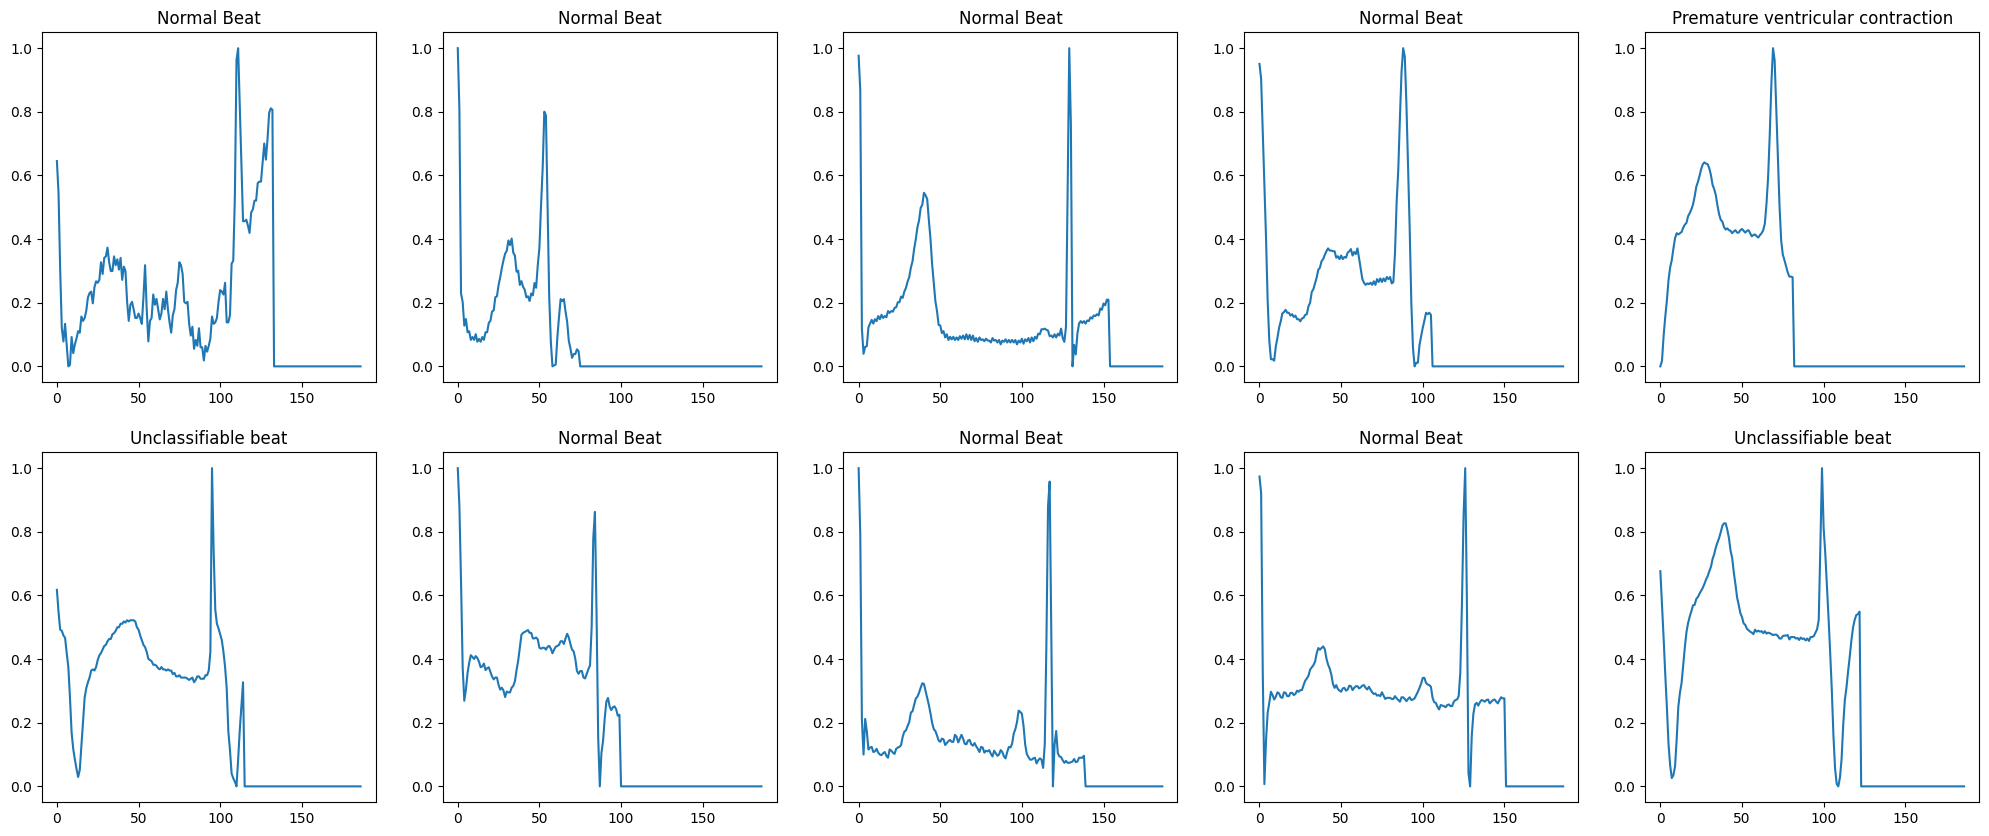

In [10]:
plt.figure(figsize=(25,10))
np_count = np.linspace(0,186,187)
np_time = np.tile(np_count,(10,1))
rnd = np.random.randint(0,mit_train.shape[0],size=(10,))


for i in range(np_time.shape[0]):
    ax = plt.subplot(2,5,i+1)
    ax.plot(mit_train.iloc[rnd[i],np_time[i,:]])
    ax.set_title(MIT_Outcome[mit_train.loc[rnd[i],'Class']])

plt.show()

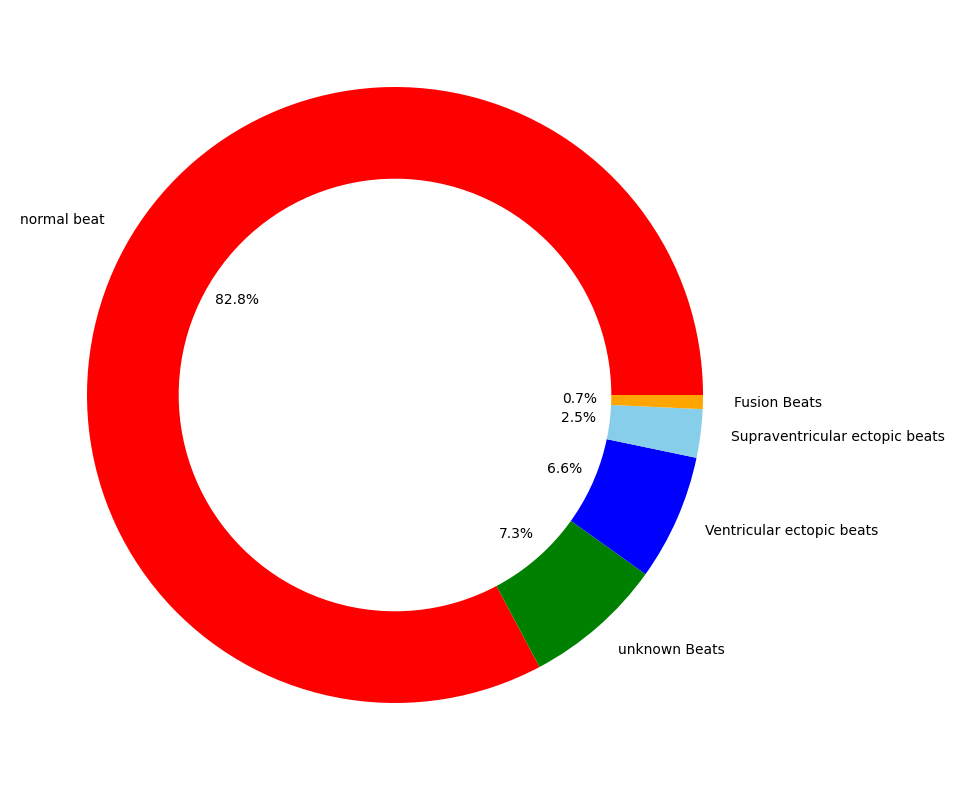

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(mit_train['Class'].value_counts(), labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report, confusion_matrix,  ConfusionMatrixDisplay
from sklearn.utils import resample

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout, InputLayer, LSTM, GRU, BatchNormalization, Bidirectional, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from mlxtend.plotting import plot_confusion_matrix

In [15]:
train_mit, valid_mit = train_test_split(mit_train, test_size=0.20, random_state=42)

In [16]:
#extract class for training
class_0=train_mit[train_mit["Class"]==0]
class_1=train_mit[train_mit["Class"]==1]
class_2=train_mit[train_mit["Class"]==2]
class_3=train_mit[train_mit["Class"]==3]
class_4=train_mit[train_mit["Class"]==4]
#upsampling and equalize the number of sample for each class
class_0_upsample=class_0
class_1_upsample=resample(class_1,replace=True,n_samples=20000,random_state=123)
class_2_upsample=resample(class_2,replace=True,n_samples=20000,random_state=124)
class_3_upsample=resample(class_3,replace=True,n_samples=20000,random_state=125)
class_4_upsample=resample(class_4,replace=True,n_samples=20000,random_state=126)

#combine
mit_train=pd.concat([class_0_upsample,class_1_upsample,class_2_upsample,class_3_upsample,class_4_upsample])

In [17]:
equilibre=mit_train['Class'].value_counts()
print(equilibre)

0.0    57892
1.0    20000
2.0    20000
3.0    20000
4.0    20000
Name: Class, dtype: int64


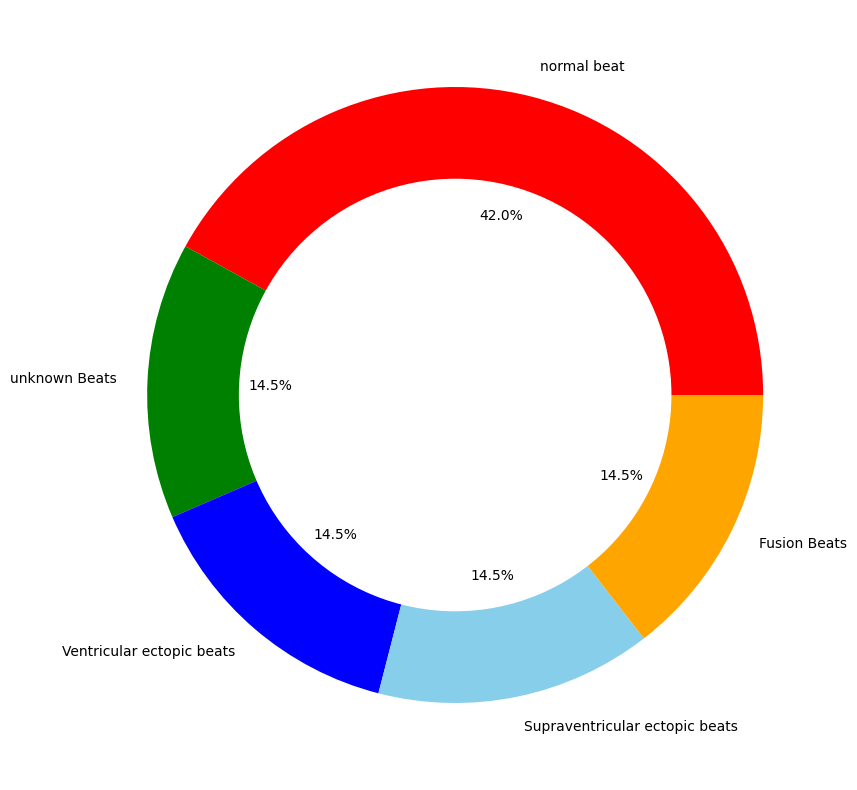

In [18]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['normal beat','unknown Beats','Ventricular ectopic beats','Supraventricular ectopic beats','Fusion Beats'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [19]:
train_mit, out_train_mit = mit_train.iloc[:,:187], mit_train.iloc[:,-1]
valid_mit, out_valid_mit = valid_mit.iloc[:,:187], valid_mit.iloc[:,-1]
test_mit, out_test_mit = mit_test.iloc[:,:187], mit_test.iloc[:,-1]

In [20]:
#Normalizing the training, validation & test data 
train_mit = normalize(train_mit, axis=0, norm='max')
valid_mit = normalize(valid_mit, axis=0, norm='max')
test_mit = normalize(test_mit, axis=0, norm='max')

In [21]:
# Reshaping the dataframe into a 3-D Numpy array (batch, Time Period, Value)
x_train_mit = train_mit.reshape(len(train_mit),train_mit.shape[1],1)
x_valid_mit = valid_mit.reshape(len(valid_mit),valid_mit.shape[1],1)
x_test_mit = test_mit.reshape(len(test_mit),test_mit.shape[1],1)

# Converting the output into a categorical array
y_train_mit = to_categorical(out_train_mit)
y_valid_mit = to_categorical(out_valid_mit)
y_test_mit = to_categorical(out_test_mit)

In [22]:
len(test_mit)

21892

In [23]:
print("Traing dataset size: ", x_train_mit.shape , " -- Y size: ", y_train_mit.shape)
print("Validation dataset size: ", x_valid_mit.shape , " -- Y size: ", y_valid_mit.shape)
print("Test dataset size: ", x_test_mit.shape , " -- Y size: ", y_test_mit.shape)

Traing dataset size:  (137892, 187, 1)  -- Y size:  (137892, 5)
Validation dataset size:  (17511, 187, 1)  -- Y size:  (17511, 5)
Test dataset size:  (21892, 187, 1)  -- Y size:  (21892, 5)


In [24]:
def build_conv1d_model_mit (input_shape=(x_train_mit.shape[1],1)):
    model = keras.models.Sequential()
    
    input_ = tf.keras.layers.Input (shape=(input_shape))
    
    conv1_1 = Conv1D(32,5, padding='same', input_shape=input_shape) (input_)
    conv1_1 = BatchNormalization() (conv1_1)
    
    conv1_2 = Conv1D(32,5, padding='same') (conv1_1)
    conv1_2 = BatchNormalization() (conv1_2)
    conv1_2 = tf.keras.layers.ReLU() (conv1_2)
   
    conv1_3 = Conv1D(32,5, padding='same') (conv1_2)
    conv1_3 = BatchNormalization() (conv1_3)

    concat_1 = Concatenate()([conv1_1 , conv1_3 ])
    concat_1 = tf.keras.layers.ReLU() (concat_1)
    max_1 = MaxPool1D(5, padding="same") (concat_1)
    #
    conv1_4 = Conv1D(32,5, padding='same') (max_1)
    conv1_4 = BatchNormalization() (conv1_4)
    conv1_4 = tf.keras.layers.ReLU() (conv1_4)
   
    conv1_5 = Conv1D(32,5, padding='same') (conv1_4)
    conv1_5 = BatchNormalization() (conv1_5)
     
    concat_2 = Concatenate()([max_1 , conv1_5 ])
    concat_2 = tf.keras.layers.ReLU() (concat_2)
    max_2 = MaxPool1D(5, strides = 2, padding="same") (concat_2)    
    #    
    conv1_6 = Conv1D(32,5, padding='same') (max_2)
    conv1_6 = BatchNormalization() (conv1_6)
    conv1_6 = tf.keras.layers.ReLU() (conv1_6)
   
    conv1_7 = Conv1D(32,5, padding='same') (conv1_6)
    conv1_7 = BatchNormalization() (conv1_7)
     
    concat_3 = Concatenate()([max_2 , conv1_7 ])
    concat_3 = tf.keras.layers.ReLU() (concat_3)
    max_3 = MaxPool1D(5, padding="same") (concat_3)    
    #
    conv1_8 = Conv1D(32,5, padding='same') (max_3)
    conv1_8 = BatchNormalization() (conv1_8)
    conv1_8 = tf.keras.layers.ReLU() (conv1_8)
   
    conv1_9 = Conv1D(32,5, padding='same') (conv1_8)
    conv1_9 = BatchNormalization() (conv1_9)
     
    concat_4 = Concatenate()([max_3 , conv1_9 ])
    concat_4 = tf.keras.layers.ReLU() (concat_4)
    max_4 = MaxPool1D(5, padding="same") (concat_4)    
    #
    conv1_10 = Conv1D(32,5, padding='same') (max_4)
    conv1_10 = BatchNormalization() (conv1_10)
    conv1_10 = tf.keras.layers.ReLU() (conv1_10)
   
    conv1_11 = Conv1D(32,5, padding='same') (conv1_10)
    conv1_11 = BatchNormalization() (conv1_11)
     
    concat_5 = Concatenate()([max_4 , conv1_11 ])
    concat_5 = tf.keras.layers.ReLU() (concat_5)
    max_5 = MaxPool1D(5,strides = 2, padding="same") (concat_5)    
    #
    
    
    flat = Flatten() (max_5)
    dense_1 = Dense(32, activation='relu') (flat)
    dense_2 = Dense(5, activation="softmax") (dense_1)
    
    model = Model (inputs=input_ , outputs=dense_2)
    
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=[tfa.metrics.F1Score(2,"micro")])
    return model

In [25]:
checkpoint_cb = ModelCheckpoint("senior_multi_diseases_2.h5", save_best_only=True)

model_conv1d_mit= build_conv1d_model_mit(input_shape=(x_train_mit.shape[1], x_train_mit.shape[2]))
model_conv1d_mit.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 187, 1)]     0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 187, 32)      192         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 187, 32)     128         ['conv1d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 conv1d_1 (Conv1D)              (None, 187, 32)      5152        ['batch_normalization[0][0]']

In [27]:
history_conv1d_mit = model_conv1d_mit.fit(x_train_mit, y_train_mit, epochs=40, batch_size=32, validation_data=(x_valid_mit, y_valid_mit), callbacks=[checkpoint_cb])

Epoch 1/40
4310/4310 [==============================] - 95s 22ms/step - loss: 0.0231 - f1_score: 0.9923 - val_loss: 0.0656 - val_f1_score: 0.9864
Epoch 2/40
4310/4310 [==============================] - 80s 19ms/step - loss: 0.0200 - f1_score: 0.9934 - val_loss: 0.0701 - val_f1_score: 0.9869
Epoch 3/40
4310/4310 [==============================] - 81s 19ms/step - loss: 0.0190 - f1_score: 0.9939 - val_loss: 0.0742 - val_f1_score: 0.9840
Epoch 4/40
4310/4310 [==============================] - 83s 19ms/step - loss: 0.0171 - f1_score: 0.9945 - val_loss: 0.0734 - val_f1_score: 0.9872
Epoch 5/40
4310/4310 [==============================] - 78s 18ms/step - loss: 0.0155 - f1_score: 0.9951 - val_loss: 0.0965 - val_f1_score: 0.9781
Epoch 6/40
4310/4310 [==============================] - 80s 19ms/step - loss: 0.0147 - f1_score: 0.9953 - val_loss: 0.0785 - val_f1_score: 0.9870
Epoch 7/40
4310/4310 [==============================] - 81s 19ms/step - loss: 0.0140 - f1_score: 0.9956 - val_loss: 0.0959 -

In [28]:
model_conv1d_mit.load_weights("senior_multi_diseases_2.h5")
model_conv1d_mit.evaluate(x_test_mit, y_test_mit)
conv1d_pred_mit_proba = model_conv1d_mit.predict (x_test_mit)
#model_conv1d_mit.evaluate(x_train_mit, y_train_mit)
#conv1d_pred_mit_proba = model_conv1d_mit.predict (x_train_mit)
conv1d_pred_mit = np.argmax(conv1d_pred_mit_proba,axis=1)

685/685 [==============================] - 3s 4ms/step


In [29]:
conv1d_pred_proba_mit = model_conv1d_mit.predict (x_test_mit)
#conv1d_pred_proba_mit = model_conv1d_mit.predict (x_train_mit)
conv1d_pred_mit = np.argmax(conv1d_pred_proba_mit, axis=1)

685/685 [==============================] - 4s 6ms/step


In [30]:
print(classification_report(out_test_mit, conv1d_pred_mit, target_names=[MIT_Outcome[i] for i in MIT_Outcome]))
#print(classification_report(out_train_mit, conv1d_pred_mit, target_names=[MIT_Outcome[i] for i in MIT_Outcome]))

                                       precision    recall  f1-score   support

                          Normal Beat       0.99      0.99      0.99     18118
      Supraventricular premature beat       0.81      0.84      0.82       556
    Premature ventricular contraction       0.95      0.97      0.96      1448
Fusion of ventricular and normal beat       0.77      0.81      0.79       162
                  Unclassifiable beat       0.99      0.99      0.99      1608

                             accuracy                           0.98     21892
                            macro avg       0.90      0.92      0.91     21892
                         weighted avg       0.98      0.98      0.98     21892



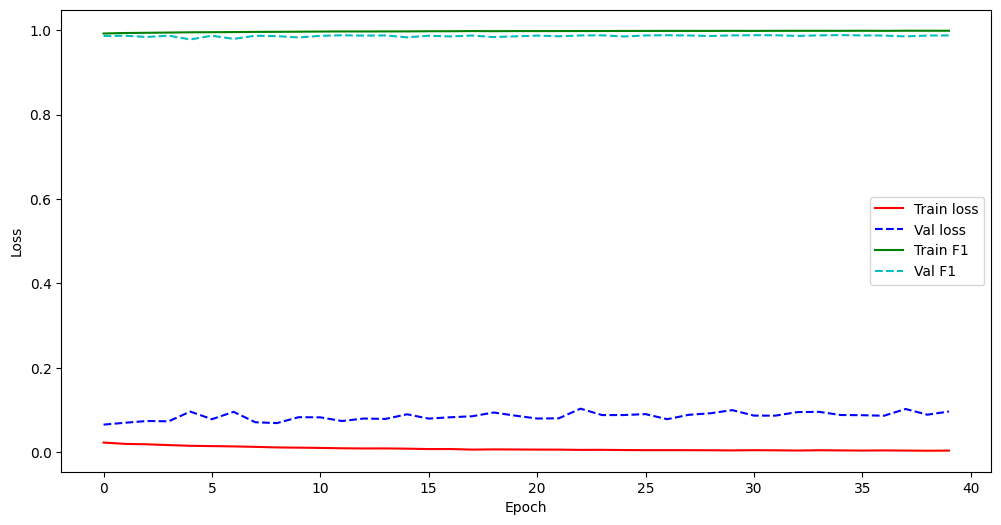

In [34]:
# Plotting the training and validation results
plt.figure(figsize=(12,6))
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['loss'],
           color='r', label='Train loss')
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['val_loss'],
           color='b', label='Val loss' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['f1_score'],
           color='g', label='Train F1')
plt.plot(history_conv1d_mit.epoch, history_conv1d_mit.history['val_f1_score'],
           color='c', label='Val F1' , linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

TP:  1588
FP:  14
FN:  20
TN:  20270


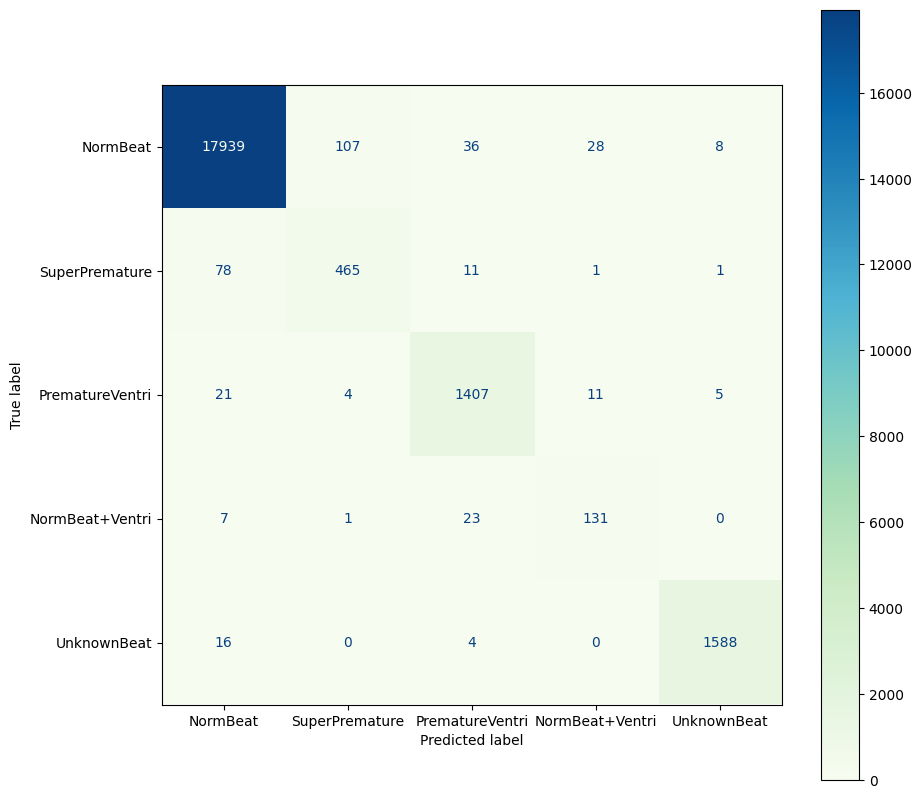

In [51]:
MIT_Outcome2 = {0. : 'NormBeat',
               1. : 'SuperPremature',
               2. : 'PrematureVentri',
               3. : 'NormBeat+Ventri',
               4. : 'UnknownBeat'}
cmm = confusion_matrix(y_true= out_test_mit, y_pred=conv1d_pred_mit, labels=list(MIT_Outcome.keys()), normalize = 'true')
cm = confusion_matrix(y_true= out_test_mit, y_pred=conv1d_pred_mit, labels=list(MIT_Outcome.keys()))
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[MIT_Outcome2[i] for i in MIT_Outcome2],)
disp.plot(cmap = "GnBu",ax=ax)

TruePositive = np.diag(cm)
FalsePositive = []
for i in range(len(MIT_Outcome)):
    FalsePositive.append(sum(cm[:,i]) - cm[i,i])
FalseNegative = []
for i in range(len(MIT_Outcome)):
    FalseNegative.append(sum(cm[i,:]) - cm[i,i])
TrueNegative = []
for i in range(len(MIT_Outcome)):
    temp = np.delete(cm, i, 0)   # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TrueNegative.append(sum(sum(temp)))
#l = len(y)
#for i in range(len(MIT_Outcome)):
#    print(TruePositive[i] + FalsePositive[i] + FalseNegative[i] + TrueNegative[i] == l)
print("TP: ", TruePositive[i])
print("FP: ", FalsePositive[i])
print("FN: ", FalseNegative[i])
print("TN: ", TrueNegative[i])